In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
data_path = '/cosma5/data/dp004/hvrn44/HOD/'

In [3]:
halo_mass_cut = 1.e11 #solar masses

In [4]:
def plot_halo_mass_function(mass, color = 'black', label = 'default'):
    nbins= 20
    bins = np.logspace(11,
                       np.log10(np.max(mass)), nbins+1)

    bin_centers = (bins[1:]+bins[:-1])/2.

    mass_func, edges = np.histogram(mass, bins=bins)
    plt.loglog((edges[1:]+edges[:-1])/2.,
               mass_func, marker='o',markersize=3.,
              color = color, label = label)

    plt.ylabel('Number of halos')
    plt.xlabel(r'$M_{200c}$')


## Halo matching

In [5]:
matching_df = pd.read_csv(data_path + 'MatchedHaloes_L205n2500.dat',
                         delimiter = ' ', skiprows = 1,
        names = ['ID_DMO', 'ID_HYDRO', 'M200_DMO', 'M200_HYDRO'])

In [6]:
matching_df

,ID_DMO,ID_HYDRO,M200_DMO,M200_HYDRO
0,0,0,1.021000e+15,1.040000e+15
1,1,1,8.764000e+14,8.856000e+14
2,2,2,6.446000e+14,7.000000e+14
3,3,3,5.923000e+14,6.094000e+14
4,4,4,5.618000e+14,5.702000e+14
...,...,...,...,...
507535,233452,17621455,1.074000e+11,1.121000e+09
507536,64861,17622524,4.568000e+11,4.780000e+08
507537,106353,17622884,2.592000e+11,7.641000e+08
507538,39555,17623990,6.809000e+11,6.064000e+08


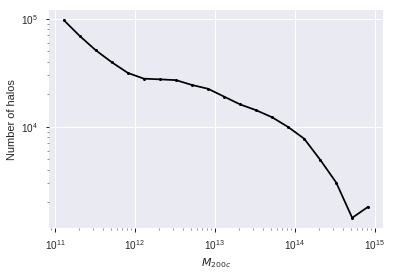

In [7]:
plot_halo_mass_function(matching_df['M200_DMO'])


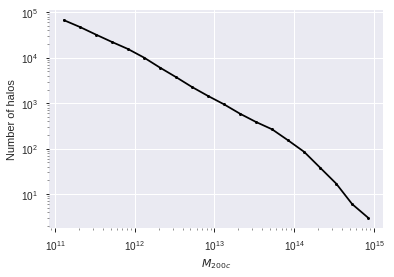

In [8]:
plot_halo_mass_function(matching_df['M200_HYDRO'])

In [9]:
print(f'There are {len(np.unique(matching_df.ID_DMO))} unique haloes in the Dark matter only simulation')

There are 228051 unique haloes in the Dark matter only simulation


In [10]:
print(f'There are {len(np.unique(matching_df.ID_HYDRO))} haloes in the hydro simulation')

There are 507540 haloes in the hydro simulation


## Halo mass cut on the DMO ones

In [11]:
mass_matching_df = matching_df.loc[matching_df['M200_DMO'] > halo_mass_cut]

In [12]:
print(f'There are {len(np.unique(mass_matching_df.ID_DMO))} unique haloes above {halo_mass_cut:.1E}'
      ' solar masses in the Dark matter only simulation')

There are 227968 unique haloes above 1.0E+11 solar masses in the Dark matter only simulation


In [13]:
print(f'There are {len(np.unique(mass_matching_df.ID_HYDRO))} unique haloes above {halo_mass_cut:.1E}'
      ' solar masses in the Hydro simulation')

There are 507434 unique haloes above 1.0E+11 solar masses in the Hydro simulation


In [14]:
idx, count = np.unique(mass_matching_df.ID_DMO, return_counts=True)

In [15]:
mass_matching_df.loc[mass_matching_df.ID_DMO == 0]

,ID_DMO,ID_HYDRO,M200_DMO,M200_HYDRO
0,0,0,1.021000e+15,1.040000e+15
30,0,30,1.021000e+15,2.637000e+14
239,0,239,1.021000e+15,7.667000e+13
2607,0,2607,1.021000e+15,8.674000e+12
13023,0,13037,1.021000e+15,2.638000e+12
...,...,...,...,...
497590,0,13922870,1.021000e+15,1.005000e+09
497619,0,13931381,1.021000e+15,1.036000e+09
499400,0,14419195,1.021000e+15,9.344000e+08
501507,0,15042347,1.021000e+15,1.086000e+09


Text(0.5,0,'Number of hydro haloes matched to the same DMO halo')

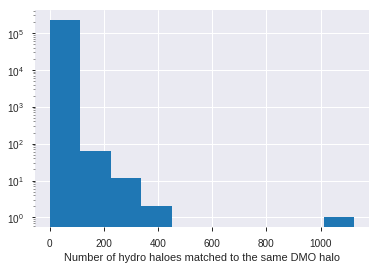

In [16]:
plt.hist(count, log = True)
plt.xlabel('Number of hydro haloes matched to the same DMO halo')

In [17]:
# keep only those haloes in the hydro simulation that have been matched to one halo in the dark matter only

In [18]:
unique_dmo_idx = idx[count == 1]

In [19]:
unique_matching_df = mass_matching_df.loc[mass_matching_df.ID_DMO.isin(unique_dmo_idx)]

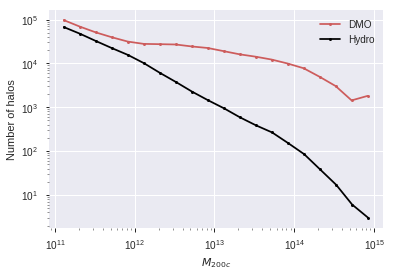

In [22]:
plot_halo_mass_function(mass_matching_df['M200_DMO'], color = 'indianred', label = 'DMO')
plot_halo_mass_function(mass_matching_df['M200_HYDRO'], color = 'black', label = 'Hydro')
plt.legend()

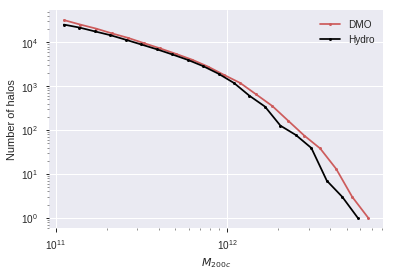

In [21]:
plot_halo_mass_function(unique_matching_df['M200_DMO'], color = 'indianred', label = 'DMO')
plot_halo_mass_function(unique_matching_df['M200_HYDRO'], color = 'black', label = 'Hydro')
plt.legend()

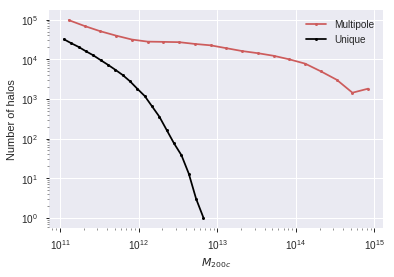

In [23]:
plot_halo_mass_function(mass_matching_df['M200_DMO'], color = 'indianred', label = 'Multipole')
plot_halo_mass_function(unique_matching_df['M200_DMO'], color = 'black', label = 'Unique')
plt.legend()

## Halo properties

In [24]:
with h5py.File(data_path + 'HaloProfiles_DMO_z0.00_ext.hdf5', 'r') as hf:
        
    print(list(hf['Haloes'].keys()))
    

    
    mass = hf['Haloes']['M200'][:]
    vmax = hf['Haloes']['Vmax'][:]
    rmax = hf['Haloes']['Rmax'][:]
    r200c = hf['Haloes']['R200'][:]
    cnfw = hf['Haloes']['Cnfw'][:]
    rhosnfw = hf['Haloes']['Rhosnfw'][:]

    massprofile = hf['Haloes']['DMMassProfile'][:]

    parametrized_cnfw = vmax/(rmax * 70)

    properties_ids = hf['Haloes']['GroupNumber'][:]

['BetaDM', 'BetaTot', 'Cnfw', 'CoP', 'DMDenProfile', 'DMMassProfile', 'DMVelProfile', 'GammaDM', 'GammaTot', 'GasDenProfile', 'GasMassProfile', 'GasVelProfile', 'GroupNumber', 'HaloMassDM', 'HaloMassGas', 'HaloMassStar', 'HaloMassTot', 'LessRR200', 'LessRadius', 'LessTexp', 'M200', 'Nsubs', 'NumPartsBH', 'NumPartsDM', 'NumPartsGas', 'NumPartsStar', 'PLIndex', 'R200', 'RR200', 'R_Conv', 'Radius', 'Rhosnfw', 'Rmax', 'Spin', 'StarDenProfile', 'StarMassProfile', 'StarVelProfile', 'SubCumSFH', 'SubSFR', 'Texp', 'TotDenProfile', 'TotMassProfile', 'TotVelProfile', 'Vmax', 'doff', 'fsub']


In [25]:
properties = np.vstack([properties_ids,mass, vmax, rmax,
                                     r200c, cnfw, rhosnfw]).T

In [26]:
properties_df = pd.DataFrame(data = properties,
                             columns = ['ID_DMO', 'M200c', 'Vmax', 'Rmax', 
                                        'R200c', 'Cnfw', 'Rhosnfw'])

In [27]:
properties_df

,ID_DMO,M200c,Vmax,Rmax,R200c,Cnfw,Rhosnfw
0,0.0,1.021094e+15,1720.320608,1.017927,1637.737427,5.698943e+00,3.148591e+06
1,1.0,8.763998e+14,1626.658679,1.095801,1556.385864,4.528827e+00,1.890909e+06
2,2.0,6.445536e+14,1435.573084,0.915569,1404.871216,5.604312e+00,2.870591e+06
3,3.0,5.922584e+14,1418.062988,0.788401,1365.790283,4.750148e+00,2.012141e+06
4,4.0,5.617762e+14,1398.909960,0.767208,1341.978027,5.069929e+00,2.391334e+06
...,...,...,...,...,...,...,...
229260,278079.0,1.007831e+11,103.223734,0.014772,75.686066,5.608999e+01,1.312776e+09
229261,278541.0,1.001213e+11,109.084942,0.011484,75.523170,7.382515e+01,2.832885e+09
229262,279423.0,1.003104e+11,108.027972,0.012738,75.567726,5.663748e+01,1.331717e+09
229263,279745.0,1.006413e+11,117.696697,0.012200,75.648079,3.588773e+07,2.795470e+26


## Merger Tree

In [28]:
 
with h5py.File(data_path + 'MergerTree_L205n2500TNG_DM_ext_New.hdf5',
               'r') as hf:
    print(list(hf.keys()))
    print(list(hf['Haloes'].keys()))
    
    formation_time = hf['Haloes']['z0p50'][:]
    n_mergers = hf['Haloes']['NMerg'][:]
    mass_peak = hf['Haloes']['Mpeak'][:]
    main_prog_mass = hf['Haloes']['MainProgMass'][:]
    vpeak = hf['Haloes']['Vpeak'][:]
    
    mergertree_ids = hf['Haloes']['Index'][:]


['Haloes']
['Index', 'MainProgMass', 'Mhist', 'Mpeak', 'NMerg', 'Redshifts', 'Vpeak', 'z0p25', 'z0p50', 'z0p75']


In [30]:
mergertree_data = np.vstack([mergertree_ids, formation_time, n_mergers,
                            mass_peak, vpeak]).T

In [31]:
mergertree_df = pd.DataFrame(data = mergertree_data, 
                columns = ['ID_DMO', 'Formation Time', 'Nmergers','MassPeak', 'vpeak'])

In [32]:
common_ids = pd.merge(mass_matching_df, mergertree_df, on = ['ID_DMO'], how = 'inner')

In [33]:
len(np.unique(common_ids['ID_DMO']))

227968

In [34]:
merged_df = pd.merge(unique_matching_df, properties_df, on = ['ID_DMO'], how = 'inner')

In [35]:
merged_df = pd.merge(merged_df, mergertree_df, on = ['ID_DMO'], how = 'inner')

In [36]:
merged_df.to_hdf('merged_dataframe.h5', key = 'df', mode = 'w')

In [37]:
np.min(merged_df.vpeak)

0.0

(array([3.8849e+04, 6.7142e+04, 2.2283e+04, 7.9610e+03, 2.5700e+03,
        6.7700e+02, 1.6200e+02, 2.9000e+01, 1.0000e+01, 2.0000e+00]),
 array([ 70.60100313,  99.07810803, 127.55521292, 156.03231782,
        184.50942272, 212.98652762, 241.46363251, 269.94073741,
        298.41784231, 326.89494721, 355.3720521 ]),
 <a list of 10 Patch objects>)

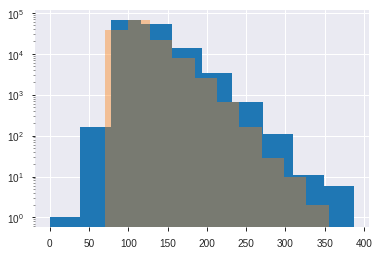

In [38]:
plt.hist(merged_df.vpeak, log=True)
plt.hist(merged_df.Vmax, log=True, alpha = 0.4)

In [40]:
merged_df

,ID_DMO,ID_HYDRO,M200_DMO,M200_HYDRO,M200c,Vmax,Rmax,R200c,Cnfw,Rhosnfw,Formation Time,Nmergers,MassPeak,vpeak
0,5176,4911,7.404000e+12,6.413000e+12,7.403636e+12,341.285688,0.193742,316.973663,5.780107,3.311509e+06,0.888712,1.0,1.054004e+13,350.585571
1,5334,4981,5.937000e+12,4.846000e+12,5.937365e+12,294.382288,0.298076,294.488647,4.394269,1.596827e+06,0.415892,3.0,9.169651e+12,321.656036
2,7238,5392,2.402000e+12,2.440000e+12,2.402108e+12,231.512614,0.352976,217.811813,3.177258,7.646312e+05,0.458952,5.0,2.608179e+12,179.030655
3,5653,5485,4.640000e+12,3.960000e+12,4.640279e+12,278.607024,0.190633,271.265900,5.482615,2.777998e+06,0.458491,2.0,6.994806e+12,293.718719
4,5543,6160,6.915000e+12,5.426000e+12,6.914848e+12,355.372052,0.085405,309.844360,8.628157,8.548512e+06,0.955517,3.0,1.071244e+13,387.690948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139680,169414,15666405,1.665000e+11,3.983000e+08,1.665380e+11,118.816171,0.015918,89.480110,19.172514,6.569397e+07,2.166447,1.0,2.544429e+11,128.871277
139681,157986,16588519,1.395000e+11,1.045000e+09,1.395459e+11,108.840086,0.020274,84.356422,14.366032,3.012063e+07,2.508967,1.0,2.879590e+11,122.507401
139682,99063,16847757,2.851000e+11,1.235000e+09,2.850953e+11,135.821922,0.021882,107.039574,12.763321,2.275998e+07,2.208860,2.0,4.746016e+11,146.854996
139683,89584,17276508,1.174000e+11,9.225000e+08,1.173755e+11,92.015236,0.013619,79.628708,7.290335,5.485306e+06,1.277335,1.0,2.030516e+11,100.451073
